# Final Project Manaswini 

# Problem Statement : Prediction of the Student Performance.

The Grade is predicted based on the previous performances and considering all the features that are affecting his study. 

The Datasets used are from the Source :
    http://archive.ics.uci.edu/ml/datasets/Student+Performance#
    
The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 


31 attribute columns are present in the dataset.    
        

# Loading the dataset

In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#studentpor3.csv
#datasetfile1.csv
df = pd.read_csv("studentpor3.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,absences,G1,G2,G3,studytime,traveltime,Total,Grade
0,GP,M,15,U,GT3,A,4,4,other,services,...,1,2,0,18,18,18,4,1,NaN,A
1,GP,F,19,U,GT3,T,4,4,teacher,other,...,1,1,0,15,17,17,2,2,NaN,B
2,MS,F,17,U,GT3,T,4,2,teacher,other,...,2,3,4,14,16,17,3,1,NaN,A
3,MS,F,15,R,GT3,T,4,4,teacher,other,...,1,2,2,16,15,16,2,3,NaN,B
4,MS,F,18,R,GT3,A,4,3,services,services,...,1,3,0,14,17,15,3,2,NaN,B
5,GP,F,17,R,GT3,T,4,4,services,services,...,1,1,0,14,15,15,3,2,NaN,B
6,GP,F,16,R,GT3,T,4,4,health,teacher,...,1,1,7,14,14,15,1,1,NaN,B
7,MS,M,18,U,LE3,T,4,4,teacher,services,...,1,1,4,14,14,15,4,1,NaN,B
8,MS,F,16,R,GT3,T,4,4,health,teacher,...,1,3,0,14,14,15,1,2,NaN,B
9,GP,F,17,U,GT3,T,4,4,services,teacher,...,2,1,0,13,14,15,2,3,NaN,B


# Cleansing the data

In [3]:
dfdata = df.loc[:,['age','studytime','traveltime','Walc','Dalc','absences','G1','G2','G3','Medu','Fedu','goout']]
dfdata


,age,studytime,traveltime,Walc,Dalc,absences,G1,G2,G3,Medu,Fedu,goout
0,15,4,1,2,1,0,18,18,18,4,4,2
1,19,2,2,1,1,0,15,17,17,4,4,2
2,17,3,1,3,2,4,14,16,17,4,2,3
3,15,2,3,2,1,2,16,15,16,4,4,3
4,18,3,2,3,1,0,14,17,15,4,3,3
5,17,3,2,1,1,0,14,15,15,4,4,2
6,16,1,1,1,1,7,14,14,15,4,4,5
7,18,4,1,1,1,4,14,14,15,4,4,3
8,16,1,2,3,1,0,14,14,15,4,4,5
9,17,2,3,1,2,0,13,14,15,4,4,3


# Setting up the data

In [4]:
dfdata.loc[:,'Total'] = (df.loc[:,'G1'] + df.loc[:,'G2']+df.loc[:,'G3'])
dfdata


,age,studytime,traveltime,Walc,Dalc,absences,G1,G2,G3,Medu,Fedu,goout,Total
0,15,4,1,2,1,0,18,18,18,4,4,2,54
1,19,2,2,1,1,0,15,17,17,4,4,2,49
2,17,3,1,3,2,4,14,16,17,4,2,3,47
3,15,2,3,2,1,2,16,15,16,4,4,3,47
4,18,3,2,3,1,0,14,17,15,4,3,3,46
5,17,3,2,1,1,0,14,15,15,4,4,2,44
6,16,1,1,1,1,7,14,14,15,4,4,5,43
7,18,4,1,1,1,4,14,14,15,4,4,3,43
8,16,1,2,3,1,0,14,14,15,4,4,5,43
9,17,2,3,1,2,0,13,14,15,4,4,3,42


# Analysing the Data

The dataset is grouped by the total marks for analysing any trends in the algorithm.and found the mean values of those columns

In [5]:
dfdata2 = dfdata.groupby([dfdata.Total]).mean()
dfdata3 = dfdata2.drop(['G1','G2','G3'],axis = 1)
dfdata3
#dfdata2

,age,studytime,traveltime,Walc,Dalc,absences,Medu,Fedu,goout,Total
Total,,,,,,,,,,
4,18.000000,1.000000,0.000000,5.000000,5.000000,0.000000,2.000000,2.000000,1.000000,4
5,16.000000,1.500000,1.500000,4.000000,5.000000,0.000000,2.500000,1.500000,3.000000,5
7,17.000000,1.500000,1.500000,4.000000,3.500000,0.000000,1.500000,2.000000,3.000000,7
8,17.000000,2.000000,2.000000,4.000000,5.000000,0.000000,1.000000,2.000000,4.000000,8
9,16.000000,4.000000,2.500000,3.000000,3.000000,2.500000,2.500000,2.000000,2.500000,9
11,17.666667,7.000000,2.000000,2.666667,1.000000,4.666667,2.000000,1.333333,4.666667,11
12,16.000000,2.000000,3.000000,2.000000,4.000000,0.000000,3.000000,4.000000,2.000000,12
13,17.000000,7.363636,1.636364,2.363636,1.545455,3.545455,2.272727,2.000000,3.727273,13
14,16.666667,1.000000,2.000000,3.000000,4.333333,0.000000,2.666667,1.000000,3.666667,14


##Plotting the Trends in the Dataset 

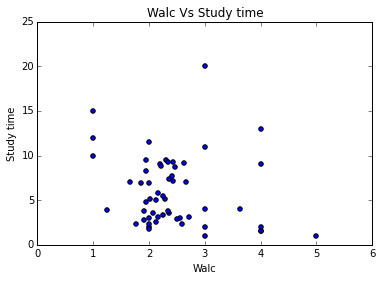

In [6]:
plt.scatter(dfdata3['Walc'],dfdata3['studytime'])

plt.xlabel("Walc")
plt.ylabel("Study time")
plt.title("Walc Vs Study time")

The observation here is that as the person is more weekend alcoholic the study of th person is decresing on an average

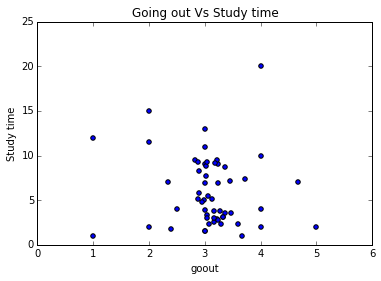

In [7]:
plt.scatter(dfdata3['goout'],dfdata3['studytime'])
plt.xlabel("goout")
plt.ylabel("Study time")
plt.title("Going out Vs Study time")

The observation here is that as the person goes out more the study of the person is also decresing on an average

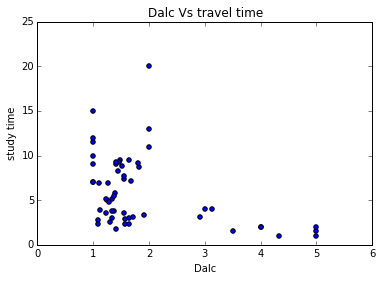

In [8]:
plt.scatter(dfdata3['Dalc'],dfdata3['studytime'])

plt.xlabel("Dalc")
plt.ylabel("study time")
plt.title("Dalc Vs travel time")

###PLots of Different attributes against the total marks of the student.

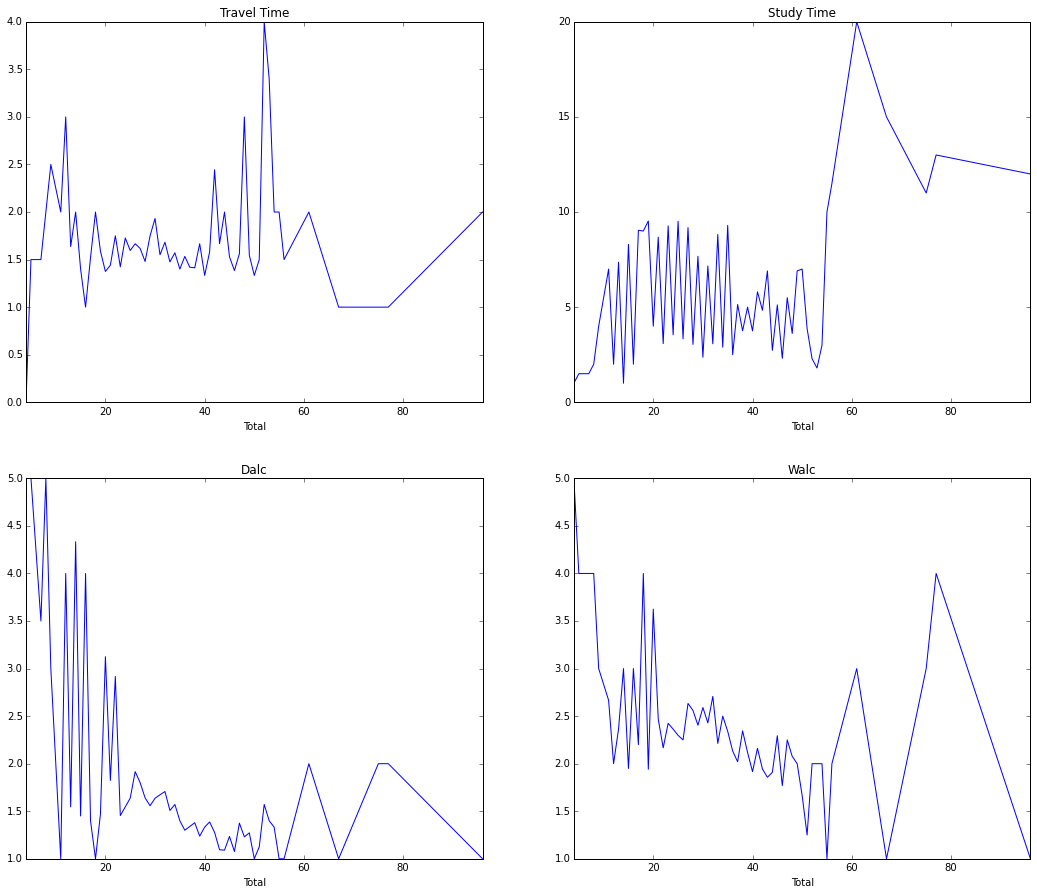

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))
dfdata3['traveltime'].plot(ax=axes[0,0]); axes[0,0].set_title('Travel Time')
dfdata3['studytime'].plot(ax=axes[0,1]); axes[0,1].set_title('Study Time')
dfdata3['Dalc'].plot(ax=axes[1,0]); axes[1,0].set_title('Dalc')
dfdata3['Walc'].plot(ax=axes[1,1]); axes[1,1].set_title('Walc')

# Data General Description

In [10]:
dfdata.describe()

,age,studytime,traveltime,Walc,Dalc,absences,G1,G2,G3,Medu,Fedu,goout,Total
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,16.724832,6.093960,1.634708,2.297220,1.546500,3.591563,9.255034,11.320230,11.907958,2.602109,2.386385,3.155321,32.483221
std,1.239941,5.746633,0.824192,1.273479,0.929623,3.654199,6.037643,3.089988,3.264296,1.124614,1.099331,1.152831,9.693303
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,9.000000,10.000000,2.000000,1.000000,2.000000,27.000000
50%,17.000000,3.000000,1.000000,2.000000,1.000000,3.000000,10.000000,11.000000,12.000000,3.000000,2.000000,3.000000,32.000000
75%,18.000000,11.000000,2.000000,3.000000,2.000000,5.000000,13.000000,13.000000,14.000000,4.000000,3.000000,4.000000,39.000000
max,22.000000,21.000000,4.000000,5.000000,5.000000,30.000000,75.000000,19.000000,20.000000,4.000000,4.000000,5.000000,96.000000


Calculated the Mean values of all the attributes in the dataset

In [11]:
Meanvalue = np.mean(dfdata.as_matrix(),axis=0)
Meanvalue

array([ 16.72483221,   6.09395973,   1.63470757,   2.29721956,
         1.54650048,   3.5915628 ,   9.25503356,  11.32023011,
        11.90795781,   2.6021093 ,   2.38638543,   3.15532119,  32.48322148])

##Plotting the data analysis Graphs, the hidden trend in the dataset can be observed here

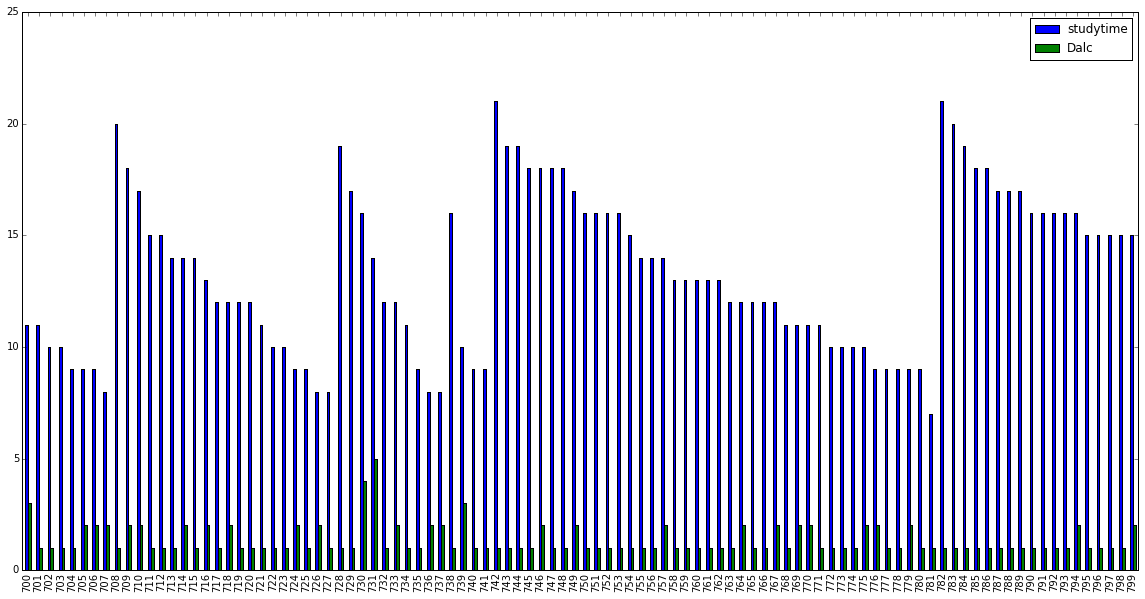

In [12]:
df3 = dfdata.loc[:,['studytime','Dalc']][700:800]
df3.plot(kind='bar',figsize =(20,10))

###By the observation the study time decreases as the alocholic rate increases.

# Splitting the Data Set

In [14]:
import random
def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]

In [15]:
dfdatalist = dfdata.values.tolist()
dftrain, dftest = splitDataset(dfdatalist,0.67)
print len(dftrain)
print len(dftest)

698
345


In [31]:
dftarget = dfdata.G3
#print dftarget.shape
dfdata2 = dfdata.drop(['G3','Total'],axis=1)

#train data
traindata = dfdata2.as_matrix()[0:698]
print "traindata shape",traindata.shape
# target data
traintarget = dftarget.as_matrix()[0:698]
print "traintarget shape",traintarget.shape


traindata shape (698L, 11L)
traintarget shape (698L,)


##Creating the Decision tree Classifier Model

In [32]:

#creating the decision tree classifier
mymodel = DecisionTreeClassifier()

#Passing the train test and fitted into the model
mymodel.fit(traindata, traintarget)

testdf = dfdata2.loc[:,['age','studytime','traveltime','Walc','Dalc','absences','G1','G2','Medu','Fedu','goout']][699:]
print "type datadf",type(testdf)
#test data

testdata = dfdata2.as_matrix()[699:]
testactualtarget = dftarget[699:]
print "testdata shape",testdata.shape
print "testactual target shape",testactualtarget.shape



type datadf <class 'pandas.core.frame.DataFrame'>
testdata shape (344L, 11L)
testactual target shape (344L,)


##Predicting the target value by passing the test data set

In [36]:
predicted2 = mymodel.predict(testdata)
print "predicted shape" ,predicted2.shape
#printing the values
#predicted2



predicted shape (344L,)


###Appended the prediceted value and to the actual value in the dataset for a clear view of the values .

In [ ]:
testdf['Grade3Predicted'] = predicted2
testdf['actual G3'] = dftarget[699:]
#print "test df",testdf['Grade3Predicted']
testdf

In [17]:
print "Mean of Predicted Value",np.mean(testdf['Grade3Predicted'])
print "Mean of Actual values in dataset",np.mean(dfdata['G3'].as_matrix(),axis=0)

Mean of Predicted Value 11.6773255814
Mean of Actual values in dataset 11.907957814


##Plotting the Predicted value and the actual value.

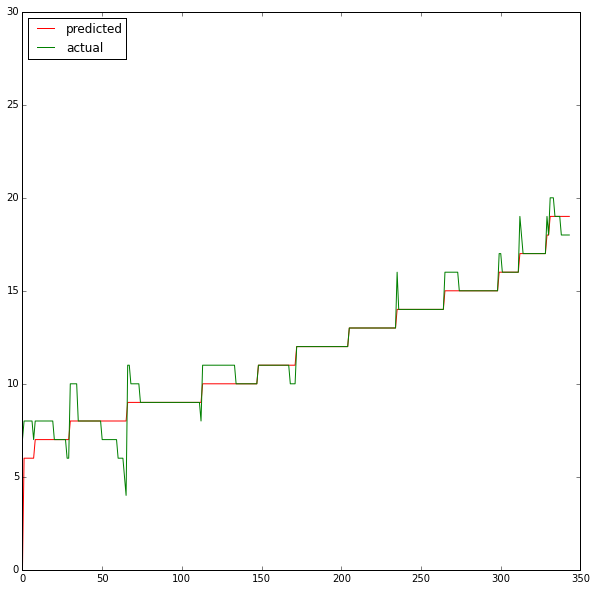

In [18]:
plt.figure(figsize=(10, 10))
plt.ylim(0,30)
testdf = testdf.sort(['Grade3Predicted','actual G3'],ascending = [1,0])
plt.plot(testdf['Grade3Predicted'].as_matrix(),'r-',label ='predicted')
plt.plot(testdf['actual G3'].as_matrix(),'g-',label = 'actual')
plt.legend(loc ='upper left')


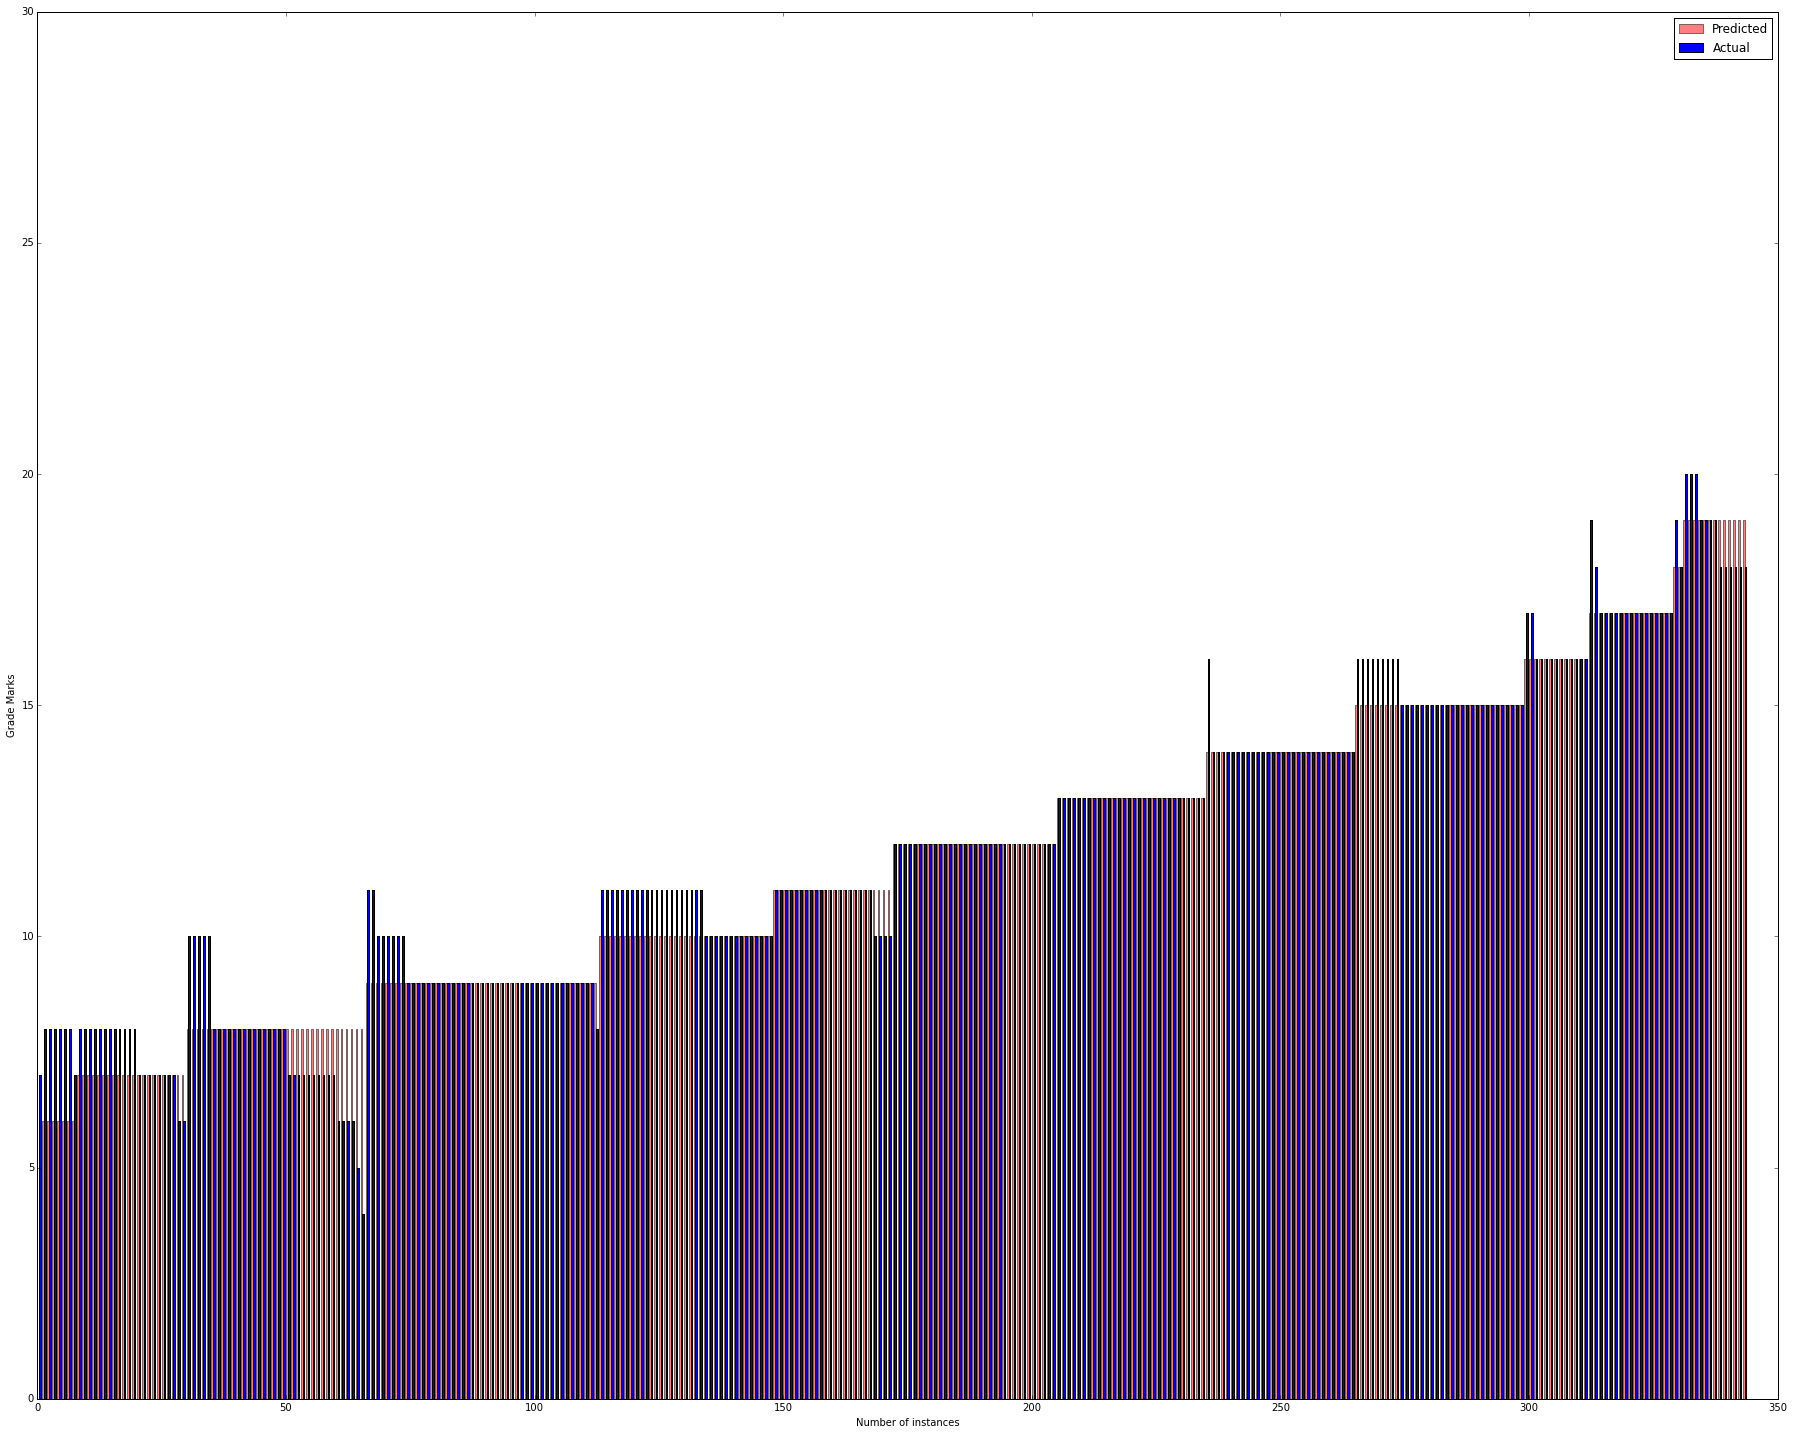

In [20]:
#df3 = testdf.loc[:,['Grade3Predicted','actual G3']]
#print type(df3)
#print df3.shape
#df3.plot(kind='bar',figsize =(15,10))

fig, ax = plt.subplots(figsize =(25,20))
bar_width = 0.35
rects1 = plt.bar(np.arange(len(testdf['Grade3Predicted'])),testdf['Grade3Predicted'].as_matrix() , bar_width,
                 alpha=0.5,
                 color='r',
                 label='Predicted')
rects2 = plt.bar(np.arange(len(testdf['Grade3Predicted'])) + bar_width, testdf['actual G3'].as_matrix(), bar_width,
                 alpha=1,
                 color='b',
                 label='Actual')
plt.ylim(0,30)
plt.xlabel('Number of instances')
plt.ylabel('Grade Marks')
plt.legend()
plt.tight_layout()

####Below is the Construction of the confusion matrix that depicts the true positive and true negative values

In [25]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(testdf['actual G3'].as_matrix()))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

####Displaying the confusion matrix and the plotting the confusion matrix the depicts the values

Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  8 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 12 15  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  6 14  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 21 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  9 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  

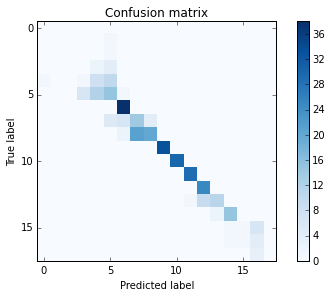

In [26]:
cm = metrics.confusion_matrix(testdf['actual G3'], testdf['Grade3Predicted'])
np.set_printoptions(precision=1)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)